# Customer Segmentation

Importing the necessary libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

The datasets is a Mall Customer Data taken from the Kaggle : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [38]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing and EDA

In [39]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\nites\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


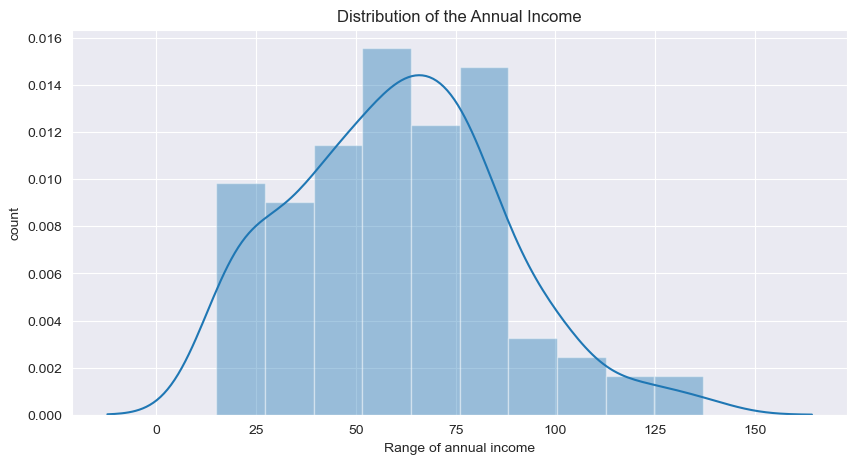

In [43]:
# Distribution of  Annual income of customers
plt.figure(figsize = (10,5))
sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of the Annual Income")
plt.xlabel("Range of annual income")
plt.ylabel("count")
plt.show()

C:\Users\nites\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


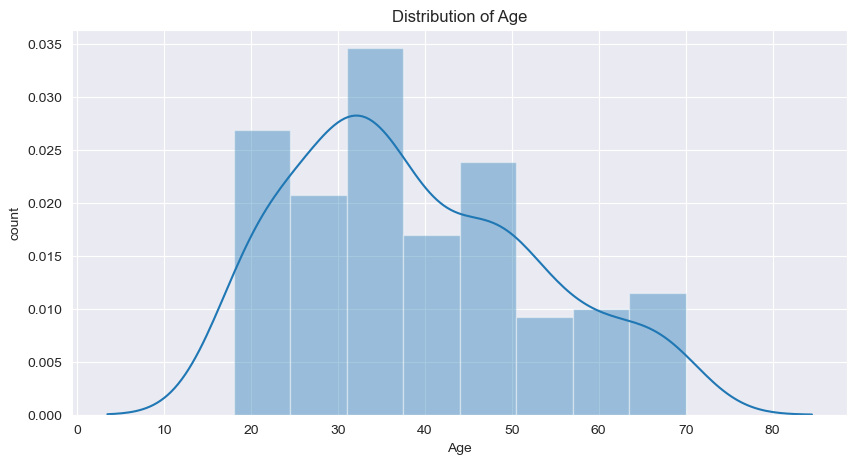

In [44]:
# Distrubtion of the Age
plt.figure(figsize = (10,5))
sns.distplot(df["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

C:\Users\nites\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


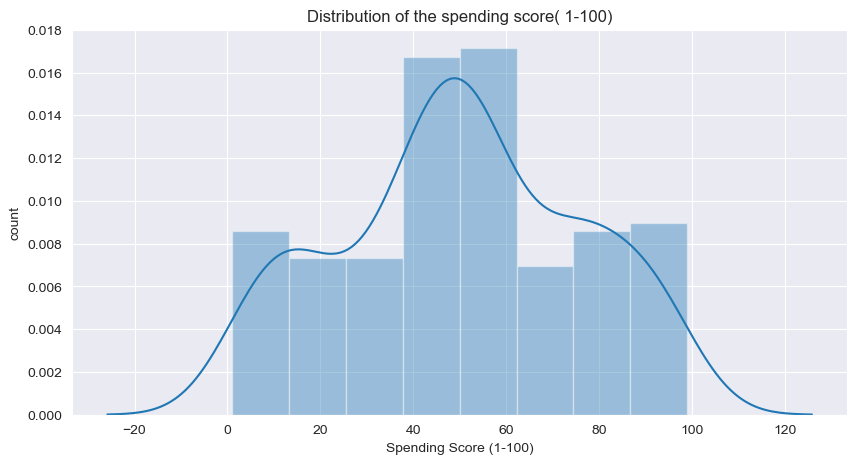

In [45]:
# Dostribution of the spending score
plt.figure(figsize=(10,5))
sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of the spending score( 1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("count")
plt.show()
# Distribution of the spending score falls between 40 to 60

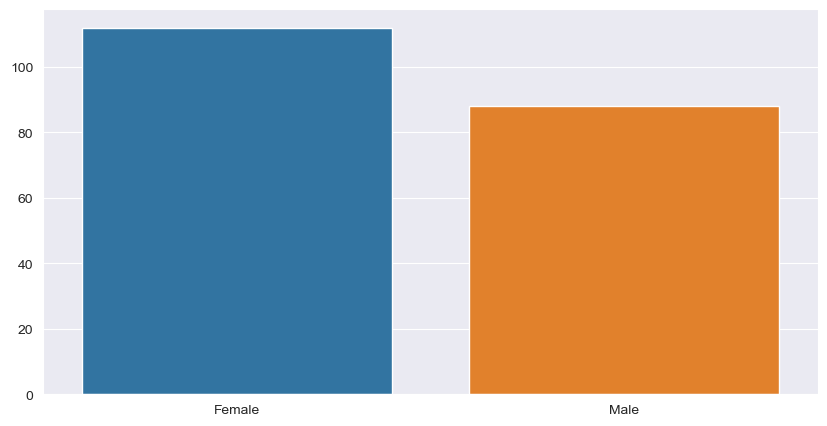

In [46]:
# Distribution of the male and female population 
data = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10,5))
sns.barplot(x = data.index, y = data.values)
plt.show()

In [47]:
# Dropping the CustomerID as is of no use for our purpose
df.drop(["CustomerID"], axis =1, inplace = True)

# Building the Clustering Model

Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value

In [48]:
# Importint the Kmeans Clustering from the sklearn
from sklearn.cluster import KMeans

C:\Users\nites\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


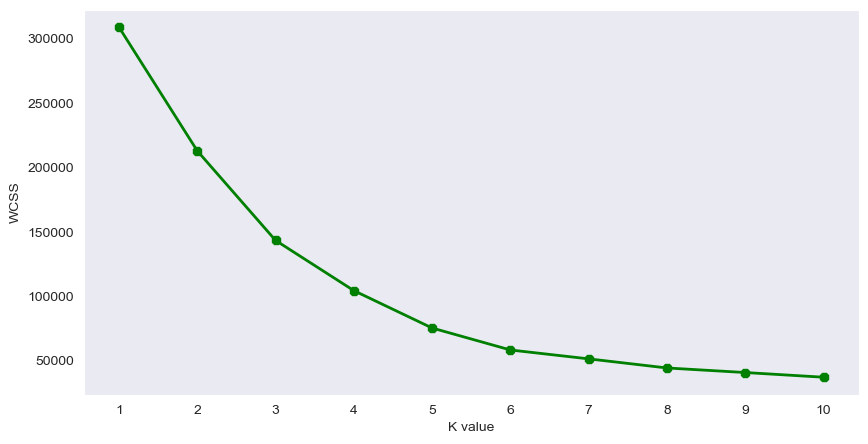

In [54]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth =2, color = "green", marker = "8")
plt.xlabel("K value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

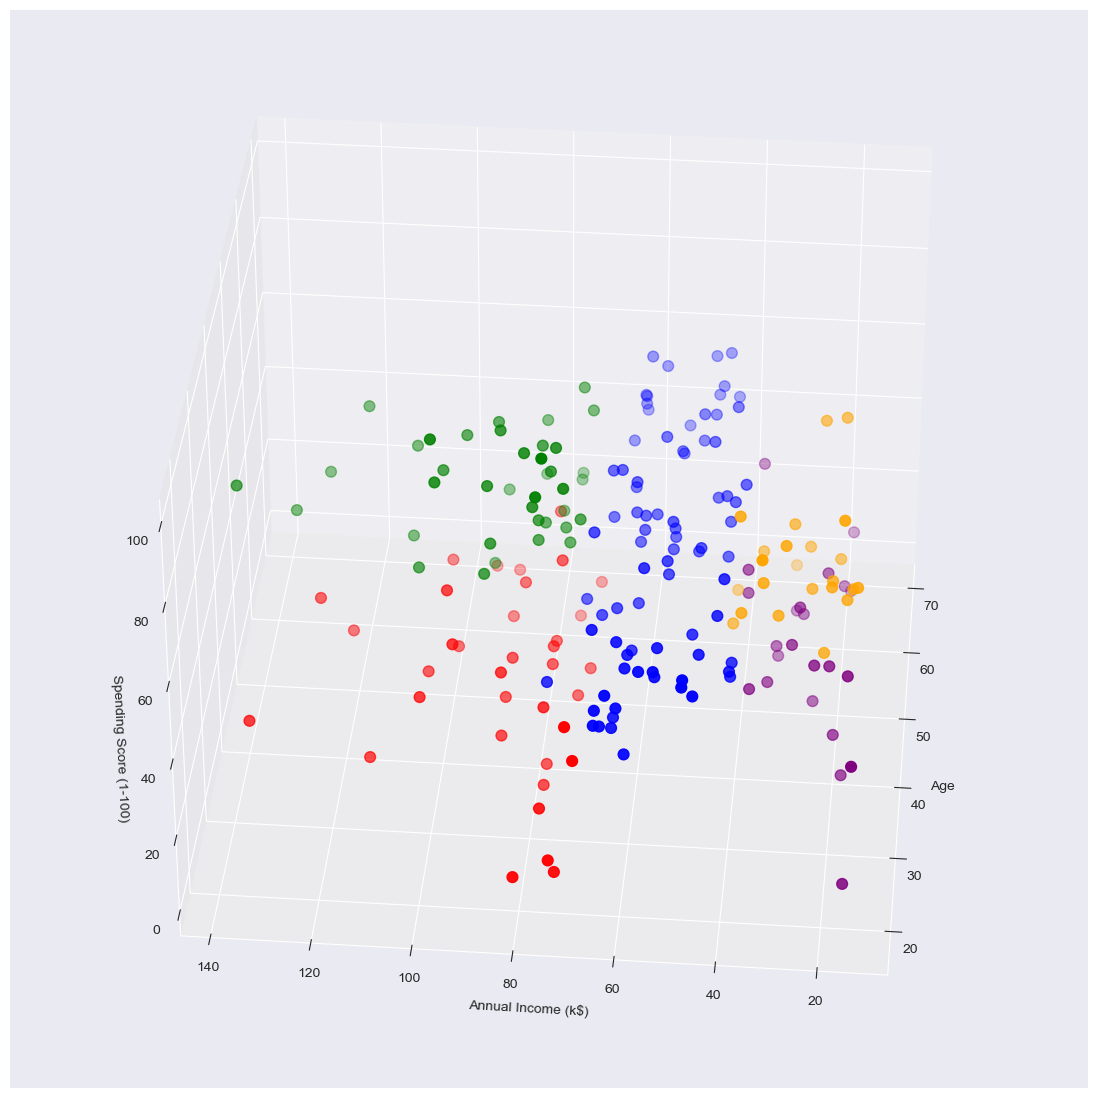

In [57]:
# The optimal value of the k(cluster) is 5 using the elbow method


km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()